<a href="https://colab.research.google.com/github/ZahraEk/Computer_Vision/blob/main/CV_EX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Alpha Blending :

Alpha blending is a technique used in computer graphics to combine two images or objects, allowing for transparency and smooth blending of overlapping elements.

At every pixel of the image, we need to combine the foreground image color (F) and the background image color (B) using the alpha mask.

(0 ≤ α ≤ 1)

>   **I = α * F + (1 - α ) B**

*  When α = 0, the output pixel color is the background.
*  When α = 1, the output pixel color is the foreground.
*  When 0 < α < 1, the output pixel color is a mix of the background and the foreground. For realistic blending, the boundary of the alpha mask usually has pixels between 0 and 1.

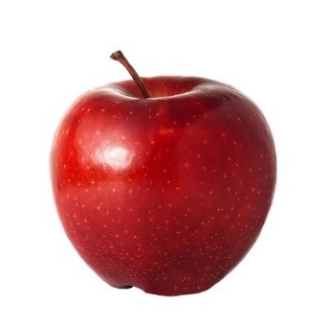

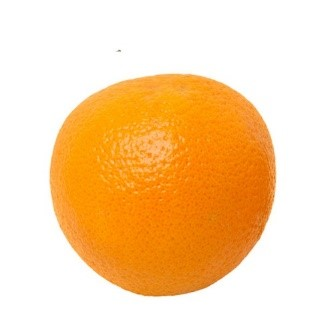

alpha value : 0.6


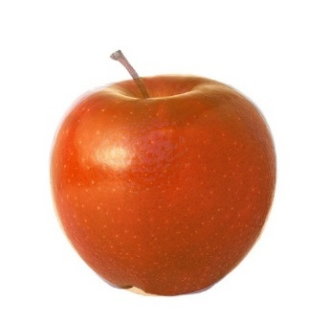

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Read the images
apple = cv2.imread('drive/MyDrive/apple.jpg')
orange = cv2.imread('drive/MyDrive/orange.jpg')

# Resize the 'apple' image to have the same dimensions as the 'orange' image
apple = cv2.resize(apple, orange.shape[1::-1])

# Display the resized 'apple' and 'orange' images
cv2_imshow(apple)
cv2_imshow(orange)

# Take user input for the alpha value (weight of blending)
alpha = float(input("alpha value : "))

# Perform alpha blending using the cv2.addWeighted function
# dst = alpha * apple + (1 - alpha) * orange + 0 (constant)
dst = cv2.addWeighted(apple, alpha , orange, 1-alpha, 0)

# Write the result of alpha blending to a file named 'alpha-blended.png'
cv2.imwrite('alpha_blended.png', dst)

# Read the alpha-blended image and display it
alpha_blended = cv2.imread('alpha_blended.png')
cv2_imshow(alpha_blended)

**The output of combining two images of apple and orange with Alpha Blending method :**

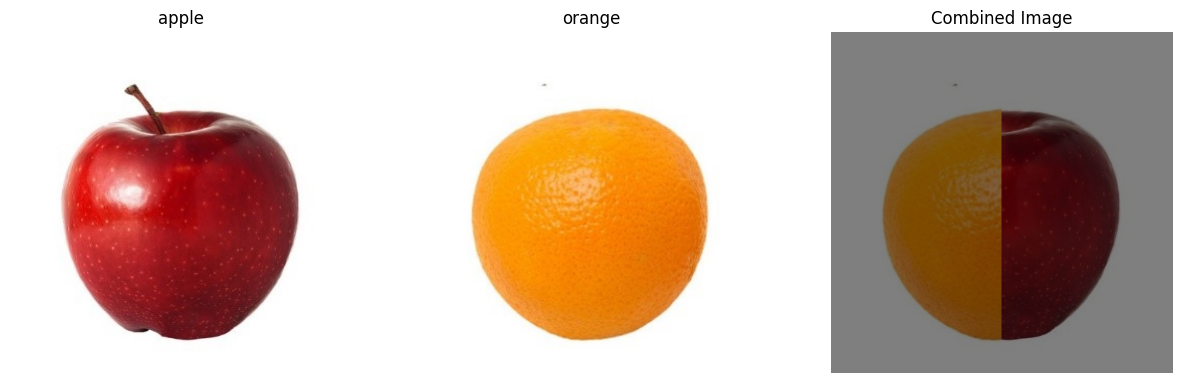

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# Read the images
apple = cv.imread('drive/MyDrive/apple.jpg')
orange = cv.imread('drive/MyDrive/orange.jpg')

# Resize the images to the same dimensions
h, w, _ = apple.shape
orange_resized = cv.resize(orange, (w, h))

# Create masks for apples on the right and oranges on the left
mask_apple = np.zeros_like(apple)
mask_apple[:, w // 2:] = 1.0  # Pixels on the right are set to 1 for apple, 0 for orange

mask_orange = 1 - mask_apple  # Inverted mask for oranges

# Alpha blending
alpha = 0.5  # alpha parameter for blending
blended_image = apple * mask_apple * alpha + orange_resized * mask_orange * (1 - alpha)

# Display the images
plt.figure(figsize=(15, 8))
plt.subplot(131), plt.imshow(cv.cvtColor(apple, cv.COLOR_BGR2RGB)), plt.title('apple'), plt.axis('off')
plt.subplot(132), plt.imshow(cv.cvtColor(orange_resized, cv.COLOR_BGR2RGB)), plt.title('orange'), plt.axis('off')
plt.subplot(133), plt.imshow(cv.cvtColor(blended_image.astype(np.uint8), cv.COLOR_BGR2RGB)), plt.title('Combined Image'), plt.axis('off')
plt.show()



---


# Laplacian Pyramid :

This code blends color and grayscale images of an apple and an orange using Laplacian pyramids. It generates Gaussian and Laplacian pyramids, combines them, and reconstructs the blended images, displaying both color and grayscale results in a using Matplotlib.

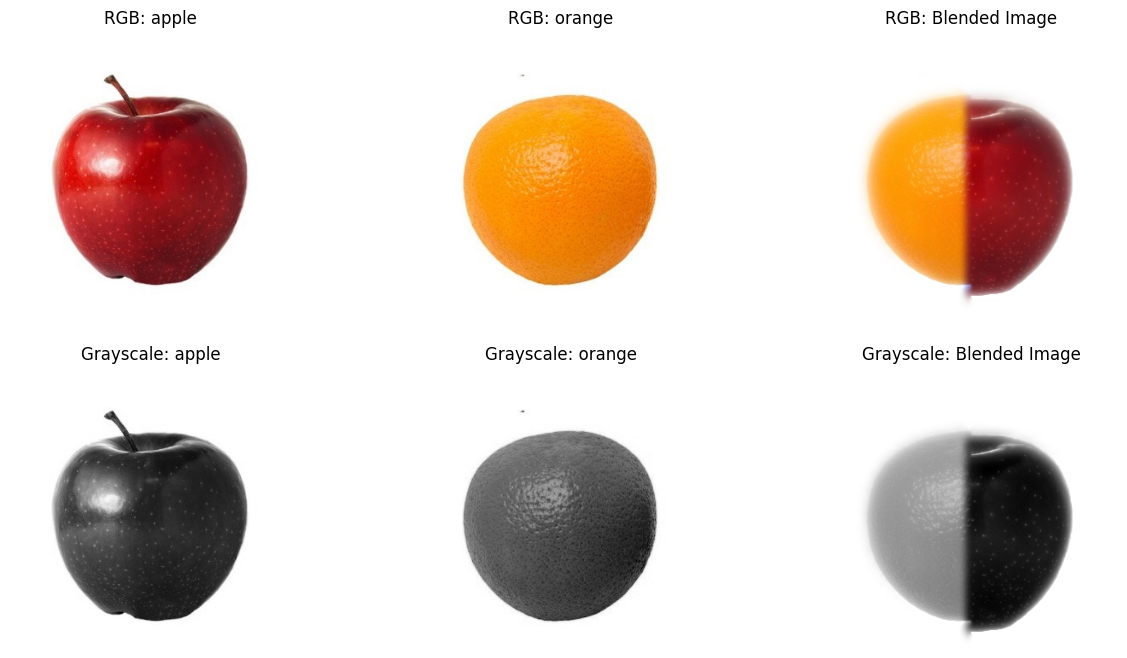

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# Read the color images
apple_color = cv.imread('drive/MyDrive/apple.jpg')
orange_color = cv.imread('drive/MyDrive/orange.jpg')

# Convert color images to grayscale
apple_gray = cv.cvtColor(apple_color, cv.COLOR_BGR2GRAY)
orange_gray = cv.cvtColor(orange_color, cv.COLOR_BGR2GRAY)

# Initialize lists to store image pyramids
A_color = [apple_color]
B_color = [orange_color]
A_gray = [apple_gray]
B_gray = [orange_gray]

LA_color, LB_color, L_color = [], [], []
LA_gray, LB_gray, L_gray = [], [], []

n = 3

# Generate Gaussian and Laplacian pyramids for color Images
for i in range(1, n + 1):
    A_color.append(cv.pyrDown(A_color[-1]))
    B_color.append(cv.pyrDown(B_color[-1]))

for i in range(n):
    # Resize color images to match dimensions before subtraction
    h, w, _ = A_color[i].shape
    A_resized_color = cv.resize(A_color[i + 1], (w, h))

    h, w, _ = B_color[i].shape
    B_resized_color = cv.resize(B_color[i + 1], (w, h))

    # Calculate Laplacian pyramids for color
    LA_color.append(cv.subtract(A_color[i], A_resized_color))
    LB_color.append(cv.subtract(B_color[i], B_resized_color))

# Append the last level of the Gaussian pyramid to complete the Laplacian pyramid for color
LA_color.append(A_color[n])
LB_color.append(B_color[n])

# Combine Laplacian pyramids to reconstruct the blended image for color
for la_color, lb_color in zip(LA_color, LB_color):
    min_height = min(la_color.shape[0], lb_color.shape[0])
    la_color = la_color[:min_height, :]
    lb_color = lb_color[:min_height, :]
    h, w, c = la_color.shape
    L_color.append(np.hstack([lb_color[:, :w // 2], la_color[:, w // 2:]]))

B_color = L_color[n]
for i in range(n, 0, -1):
    h, w, _ = L_color[i - 1].shape
    B_color = cv.add(cv.pyrUp(B_color, dstsize=(w, h)), L_color[i - 1])

# Generate Gaussian and Laplacian pyramids for Grayscale Images
for i in range(1, n + 1):
    A_gray.append(cv.pyrDown(A_gray[-1]))
    B_gray.append(cv.pyrDown(B_gray[-1]))

for i in range(n):
    # Resize grayscale images to match dimensions before subtraction
    h, w = A_gray[i].shape
    A_resized_gray = cv.resize(A_gray[i + 1], (w, h))

    h, w = B_gray[i].shape
    B_resized_gray = cv.resize(B_gray[i + 1], (w, h))

    # Calculate Laplacian pyramids for grayscale
    LA_gray.append(cv.subtract(A_gray[i], A_resized_gray))
    LB_gray.append(cv.subtract(B_gray[i], B_resized_gray))

# Append the last level of the Gaussian pyramid to complete the Laplacian pyramid for grayscale
LA_gray.append(A_gray[n])
LB_gray.append(B_gray[n])

# Combine Laplacian pyramids to reconstruct the blended image for grayscale
for la_gray, lb_gray in zip(LA_gray, LB_gray):
    min_height = min(la_gray.shape[0], lb_gray.shape[0])
    la_gray = la_gray[:min_height, :]
    lb_gray = lb_gray[:min_height, :]
    h, w = la_gray.shape
    L_gray.append(np.hstack([lb_gray[:, :w // 2], la_gray[:, w // 2:]]))

B_gray = L_gray[n]
for i in range(n, 0, -1):
    h, w = L_gray[i - 1].shape
    B_gray = cv.add(cv.pyrUp(B_gray, dstsize=(w, h)), L_gray[i - 1])

# Display the images
plt.figure(figsize=(15, 8))

# Color Images
plt.subplot(231), plt.imshow(cv.cvtColor(apple_color, cv.COLOR_BGR2RGB)), plt.title('RGB: apple'), plt.axis('off')
plt.subplot(232), plt.imshow(cv.cvtColor(orange_color, cv.COLOR_BGR2RGB)), plt.title('RGB: orange'), plt.axis('off')
plt.subplot(233), plt.imshow(cv.cvtColor(B_color, cv.COLOR_BGR2RGB)), plt.title('RGB: Blended Image'), plt.axis('off')

# Grayscale Images
plt.subplot(234), plt.imshow(apple_gray, cmap='gray'), plt.title('Grayscale: apple'), plt.axis('off')
plt.subplot(235), plt.imshow(orange_gray, cmap='gray'), plt.title('Grayscale: orange'), plt.axis('off')
plt.subplot(236), plt.imshow(B_gray, cmap='gray'), plt.title('Grayscale: Blended Image'), plt.axis('off')

# Show the plot
plt.show()